In [197]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os

data = pd.read_csv("data/original_life_expectancy_data.csv")
bmi = pd.read_csv("data/BMI.csv")
measles = pd.read_csv("data/measles_immunization.csv")
countries = pd.read_csv("data/CountryNames.csv")
gdp = pd.read_csv("data/GDP.csv", header=4)
population = pd.read_csv("data/Population Data Set.csv", header=4)
coordinates = pd.read_csv("data/lat_long_values.csv")

In [198]:

bmi = pd.DataFrame(bmi)

In [199]:
data['New BMI'] = 0
bmi = bmi[bmi['FactValueNumeric'].isna() != True]
bmi['FactValueNumeric'].isna().value_counts(normalize=True)

False    1.0
Name: FactValueNumeric, dtype: float64

In [200]:
for index, row in data.iterrows():
    try:
        mask = ((bmi['Location'] == row['Country']) & (bmi['Period'] == row['Year']) & (bmi['Dim1'] == 'Both sexes'))
        x = bmi[mask]['FactValueNumeric']
        #print(x, type(x))
        data.loc[index, 'New BMI'] = float(x)
        #data.iloc[index, 'New BMI'] = float(BMI[((BMI['Location'] == row['Country']) & (BMI['Period'] == row['Year']) & (BMI['Dim1'] == 'Both sexes'))]['FactValueNumeric'].values[0])
        if len(x)==0:
            continue
    except:
        continue        


In [201]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,New BMI
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,23.3
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,23.2
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,23.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,22.9
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,22.8


In [202]:
i = 0
for index, row in gdp.iterrows():
    try:
        mask = row['Country Name'] == countries['Country']    
        x = countries[mask]['Target Name'].values[0]
        gdp.at[index, 'Country Name'] = x
    
    except:    
        continue

In [203]:
for index, row in data.iterrows():
    try:
        mask = gdp['Country Name'] == row['Country']     
        x = gdp[mask][str(row['Year'])].values[0]
        data.at[index, 'New GDP'] = x
    
    except:
    
        continue


data['New GDP'].isna().value_counts(normalize=True)

False    0.956093
True     0.043907
Name: New GDP, dtype: float64

In [204]:
for index, row in data.iterrows():
    try:
        mask = measles['Country Name'] == row['Country']     
        x = measles[mask][str(row['Year'])].values[0]
        data.at[index, 'New Measles'] = x
    
    except:
    
        continue

In [205]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,New BMI,New GDP,New Measles
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,23.3,574.184114,63.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,23.2,583.656193,60.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,23.0,587.565090,57.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,22.9,576.190126,59.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,22.8,528.736648,64.0


In [206]:
i = 0
for index, row in population.iterrows():
    try:
        mask = row['Country Name'] == countries['Country']    
        x = countries[mask]['Target Name'].values[0]
        population.at[index, 'Country Name'] = x
    
    except:    
        continue

In [207]:
for index, row in data.iterrows():
    try:
        mask = population['Country Name'] == row['Country']     
        x = population[mask][str(row['Year'])].values[0]
        data.at[index, 'New Population'] = x
    
    except:
    
        continue
data['New Population'].isna().value_counts(normalize=True)

False    0.98162
True     0.01838
Name: New Population, dtype: float64

In [208]:
print(data['New Population'].isna().value_counts(normalize=True))
print(data['Population'].isna().value_counts(normalize=True))

False    0.98162
True     0.01838
Name: New Population, dtype: float64
False    0.77808
True     0.22192
Name: Population, dtype: float64


In [209]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,New BMI,New GDP,New Measles,New Population
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,23.3,574.184114,63.0,34413603.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,23.2,583.656193,60.0,33370804.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,23.0,587.565090,57.0,32269592.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,22.9,576.190126,59.0,31161378.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,22.8,528.736648,64.0,30117411.0


In [210]:
data['Latitude'] = 0
data['Longitude'] = 0
for index, row in data.iterrows():
    try:
        mask = coordinates['country'] == row['Country'] 
        x = coordinates[mask]['latitude']
        y = coordinates[mask]['longitude']
        data.at[index, 'Latitude'] = x
        data.at[index, 'Longitude'] = y
    
    except:
    
        continue

In [211]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,New BMI,New GDP,New Measles,New Population,Latitude,Longitude
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,17.2,17.3,0.479,10.1,23.3,574.184114,63.0,34413603.0,33,67
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,17.5,17.5,0.476,10.0,23.2,583.656193,60.0,33370804.0,33,67
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,17.7,17.7,0.470,9.9,23.0,587.565090,57.0,32269592.0,33,67
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,17.9,18.0,0.463,9.8,22.9,576.190126,59.0,31161378.0,33,67
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,18.2,18.2,0.454,9.5,22.8,528.736648,64.0,30117411.0,33,67


In [212]:
print(data['Latitude'].isna().value_counts(normalize=True))
print(data['Longitude'].isna().value_counts(normalize=True))

False    1.0
Name: Latitude, dtype: float64
False    1.0
Name: Longitude, dtype: float64


In [219]:
# data.loc[data.Status == "Developing"]['Status Color'] = 0
# data.loc[data.Status == "Developed"]['Status Color'] = 1
# data.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,New BMI,New GDP,New Measles,New Population,Latitude,Longitude
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,17.2,17.3,0.479,10.1,23.3,574.184114,63.0,34413603.0,33,67
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,17.5,17.5,0.476,10.0,23.2,583.656193,60.0,33370804.0,33,67
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,17.7,17.7,0.470,9.9,23.0,587.565090,57.0,32269592.0,33,67
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,17.9,18.0,0.463,9.8,22.9,576.190126,59.0,31161378.0,33,67
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,18.2,18.2,0.454,9.5,22.8,528.736648,64.0,30117411.0,33,67


In [214]:
data.dropna(subset = ['Life expectancy '], inplace = True)

In [215]:
data.shape

(2928, 28)

In [216]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'New BMI', 'New GDP',
       'New Measles', 'New Population', 'Latitude', 'Longitude'],
      dtype='object')

In [217]:
data = data[['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'New BMI', 'New GDP',
       'New Measles', 'New Population', 'Latitude', 'Longitude']]

KeyError: "['Status Color'] not in index"

In [ ]:
data.columns

In [ ]:
data.head()

# General Trends

In [ ]:
overall_average = data.groupby(['Year'])
overall_average = overall_average.aggregate({'Life expectancy ' : 'mean'})

#overall_average.head(16)
plt.plot(overall_average.index, overall_average['Life expectancy '])

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy vs Year')
plt.savefig('Average Life Expectancy vs Year 1.jpg')
plt.show()

# Average Life Expectancy by Country

In [ ]:
mask1 = data['Country'] == 'United States of America'
mask2 = data['Country'] == 'Saudi Arabia'
mask3 = data['Country'] == 'China'
mask4 = data['Country'] == 'India'
USA_average = data[mask1]
Saudi_average = data[mask2]
China_average = data[mask3]
India_average = data[mask4]

In [ ]:
plt.plot(USA_average['Year'], USA_average['Life expectancy '], label = "USA")
plt.plot(Saudi_average['Year'], Saudi_average['Life expectancy '], label = "Saudi Arabia")
plt.plot(China_average['Year'], China_average['Life expectancy '], label = "China")
plt.plot(India_average['Year'], India_average['Life expectancy '], label = "India")
plt.legend()

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy vs Year')
plt.savefig('Average Life Expectancy vs Year 2.jpg')

plt.show()

In [ ]:
country_average = data.groupby(['Country'])
country_average = country_average.aggregate({'Life expectancy ' : 'mean'}).sort_values("Life expectancy ")
country_average = country_average.head(5).append(country_average.tail(5))
country_average.head()

#colors=np.random.rand(183)

# plt.figure(figsize=(10,40))
plt.barh(country_average.index, country_average['Life expectancy '], align='edge')

plt.title('Country Life Expectency (top 5 and bottom 5)')
plt.xlabel('Life Expectency')
plt.ylabel('Country')
plt.savefig('CountrysAverage.jpg')
plt.show()

In [ ]:
#data['Status'].isnull().value_counts(normalize = True)
aggre_data = data.groupby('Status')['Life expectancy '].sum()/data.groupby('Status')['Life expectancy '].count()
aggre_data = pd.DataFrame(aggre_data)

bar_width = 0.7
opacity = 0.7
plt.figure(figsize=(3,4))

plt.bar(aggre_data.index, aggre_data['Life expectancy '], bar_width,alpha=opacity,color='b')
plt.tight_layout()
plt.title('Country Status vs Life Expectency')
plt.xlabel('Status')
plt.ylabel('Life Expectency')
plt.savefig('Country Status vs Life Expectency.jpg')
plt.show()

# Schooling Dataset

In [ ]:
schooling = data[['Country', 'Year', 'Status', 'Life expectancy ', 'Schooling','New Population']]

In [ ]:
schooling.head()

In [ ]:
schooling = schooling.dropna(subset=["Schooling"]).copy()

In [ ]:
print(schooling['Schooling'].isna().value_counts(normalize=True))

In [ ]:
#reference: https://realpython.com/python-histograms/ 
plt.hist(x=schooling['Schooling'], rwidth=0.85)
plt.xlabel('Years of Schooling')
plt.ylabel('Frequency')
plt.title('Histograms of Schooling')
plt.show()

In [ ]:
schooling.boxplot(column = ['Schooling'])

In [ ]:
Q1 = schooling['Schooling'].quantile(q=0.25)
Q3 = schooling['Schooling'].quantile(q=0.75)
mask1 = (schooling['Schooling'] < Q3 + 1.5 * (Q3-Q1)) & (schooling['Schooling'] > Q1 - 1.5 * (Q3-Q1))
schooling = schooling[mask1]

In [ ]:
plt.hist(x=schooling['Schooling'], rwidth=0.85)
plt.xlabel('Years of Schooling')
plt.ylabel('Frequency')
plt.title('Histograms of Schooling')
plt.show()

In [ ]:
print(schooling.corr())
plt.scatter(schooling['Schooling'], schooling['Life expectancy '], marker=".", color = "y")
model = np.poly1d(np.polyfit(schooling['Schooling'], schooling['Life expectancy '], 1))
polyline = np.linspace(0,22)
plt.plot(polyline, model(polyline))
print(model)
plt.title('Life Expectancy vs Schooling')
plt.xlabel('Schooling')
plt.ylabel("Life Expectancy")
plt.show()

# Correlation Matrix

In [ ]:
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, square=True, annot=True, linewidth=0.5, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

# Income Composition

In [ ]:
income_comp = data[['Country', 'Year', 'Status', 'Life expectancy ', 'Income composition of resources','New Population']]
income_comp = income_comp.dropna(subset=["Income composition of resources"]).copy()

plt.hist(x=income_comp['Income composition of resources'], rwidth=0.85)
plt.xlabel('Income Composition')
plt.ylabel('Frequency')
plt.title('Histogram of Income Composition')
plt.show()

income_comp.boxplot(column = ['Income composition of resources'])
plt.show()

Q1 = income_comp['Income composition of resources'].quantile(q=0.25)
Q3 = income_comp['Income composition of resources'].quantile(q=0.75)
mask1 = (income_comp['Income composition of resources'] < Q3 + 1.5 * (Q3-Q1)) & (income_comp['Income composition of resources'] > Q1 - 1.5 * (Q3-Q1))
income_comp = income_comp[mask1]

plt.hist(x=income_comp['Income composition of resources'], rwidth=0.85)
plt.xlabel('Income Composition')
plt.ylabel('Frequency')
plt.title('Histogram of Income Composition')
plt.show()

plt.scatter(income_comp['Income composition of resources'], income_comp['Life expectancy '], marker=".", color = "y")
model = np.poly1d(np.polyfit(income_comp['Income composition of resources'], income_comp['Life expectancy '], 1))
polyline = np.linspace(0,1)
plt.plot(polyline, model(polyline))
print(model)
plt.title('Life Expectancy vs Income Composition')
plt.xlabel('Income Composition')
plt.ylabel("Life Expectancy")
plt.show()

# Population

In [ ]:
population = data[['Country', 'Year', 'Status', 'Life expectancy ', 'New Population']]
population = population.dropna(subset=["New Population"]).copy()

# plt.hist(x=population['New Population'], rwidth=0.85)
# plt.xlabel('Population')
# plt.ylabel('Frequency')
# plt.title('Histogram of Population')
# plt.show()

# population.boxplot(column = ['New Population'])
# plt.show()

# Q1 = population['New Population'].quantile(q=0.25)
# Q3 = population['New Population'].quantile(q=0.75)
# mask1 = (population['New Population'] < Q3 + 1.5 * (Q3-Q1)) & (population['New Population'] > Q1 - 1.5 * (Q3-Q1))
# population = population[mask1]

# plt.hist(x=population['New Population'], rwidth=0.85)
# plt.xlabel('Population')
# plt.ylabel('Frequency')
# plt.title('Histogram of Population')
# plt.show()

plt.scatter(population['New Population'], population['Life expectancy '], marker=".", color = "y")
model = np.poly1d(np.polyfit(population['New Population'], population['Life expectancy '], 2))
polyline = np.linspace(0,1.4e9)
plt.plot(polyline, model(polyline))
print(model)
plt.title('Life Expectancy vs Population')
plt.xlabel('Population')
plt.ylabel("Life Expectancy")
plt.show()

# Thinness

In [ ]:
thinness = data[['Country', 'Year', 'Status', 'Life expectancy ', ' thinness  1-19 years','New Population']]
thinness = thinness.dropna(subset=[" thinness  1-19 years"]).copy()

plt.hist(x=thinness[' thinness  1-19 years'], rwidth=0.85)
plt.xlabel('Thinness (1-19)')
plt.ylabel('Frequency')
plt.title('Histogram of Thinness (1-19)')
plt.show()

thinness.boxplot(column = [' thinness  1-19 years'])
plt.show()

Q1 = thinness[' thinness  1-19 years'].quantile(q=0.25)
Q3 = thinness[' thinness  1-19 years'].quantile(q=0.75)
mask1 = (thinness[' thinness  1-19 years'] < Q3 + 1.5 * (Q3-Q1)) & (thinness[' thinness  1-19 years'] > Q1 - 1.5 * (Q3-Q1))
thinness = thinness[mask1]

plt.hist(x=thinness[' thinness  1-19 years'], rwidth=0.85)
plt.xlabel('Thinness (1-19)')
plt.ylabel('Frequency')
plt.title('Histogram of Thinness (1-19)')
plt.show()

plt.scatter(thinness[' thinness  1-19 years'], thinness['Life expectancy '], marker=".", color = "y")
model = np.poly1d(np.polyfit(thinness[' thinness  1-19 years'], thinness['Life expectancy '], 1))
polyline = np.linspace(0,16)
plt.plot(polyline, model(polyline))
print(model)
plt.title('Life Expectancy vs Thinness (1-19)')
plt.xlabel('Thinness (1-19)')
plt.ylabel("Life Expectancy")
plt.show()

In [ ]:
thinness = data[['Country', 'Year', 'Status', 'Life expectancy ', ' thinness 5-9 years','New Population']]
thinness = thinness.dropna(subset=[" thinness 5-9 years"]).copy()

plt.hist(x=thinness[' thinness 5-9 years'], rwidth=0.85)
plt.xlabel('Thinness (5-9)')
plt.ylabel('Frequency')
plt.title('Histogram of Thinness (5-9)')
plt.show()

thinness.boxplot(column = [' thinness 5-9 years'])
plt.show()

Q1 = thinness[' thinness 5-9 years'].quantile(q=0.25)
Q3 = thinness[' thinness 5-9 years'].quantile(q=0.75)
mask1 = (thinness[' thinness 5-9 years'] < Q3 + 1.5 * (Q3-Q1)) & (thinness[' thinness 5-9 years'] > Q1 - 1.5 * (Q3-Q1))
thinness = thinness[mask1]

plt.hist(x=thinness[' thinness 5-9 years'], rwidth=0.85)
plt.xlabel('Thinness (5-9)')
plt.ylabel('Frequency')
plt.title('Histogram of Thinness (5-9)')
plt.show()

plt.scatter(thinness[' thinness 5-9 years'], thinness['Life expectancy '], marker=".", color = "y")
model = np.poly1d(np.polyfit(thinness[' thinness 5-9 years'], thinness['Life expectancy '], 1))
polyline = np.linspace(0,16)
plt.plot(polyline, model(polyline))
print(model)
plt.title('Life Expectancy vs Thinness (5-9)')
plt.xlabel('Thinness (5-9)')
plt.ylabel("Life Expectancy")
plt.show()

# Alcohol


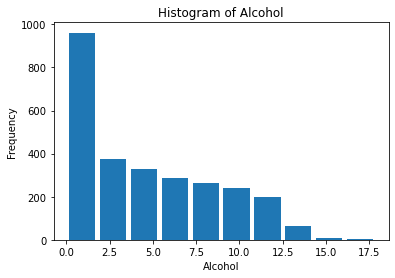

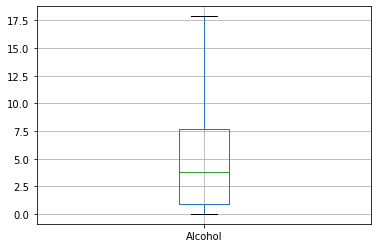

          3          2
-0.01613 x + 0.3373 x - 0.8173 x + 66.1


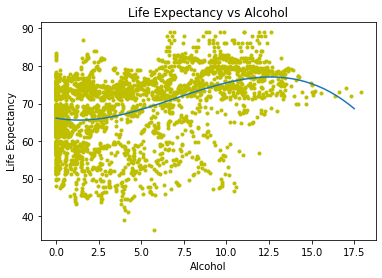

In [224]:
alcohol = data[['Country', 'Year', 'Status', 'Life expectancy ', 'Alcohol','New Population']]
alcohol = alcohol.dropna(subset=["Alcohol"]).copy()

plt.hist(x=alcohol['Alcohol'], rwidth=0.85)
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol')
plt.show()

alcohol.boxplot(column = ['Alcohol'])
plt.show()

# Q1 = alcohol['Alcohol'].quantile(q=0.25)
# Q3 = alcohol['Alcohol'].quantile(q=0.75)
# mask1 = (alcohol['Alcohol'] < Q3 + 1.5 * (Q3-Q1)) & (alcohol['Alcohol'] > Q1 - 1.5 * (Q3-Q1))
# alcohol = alcohol[mask1]

# plt.hist(x=alcohol['Alcohol'], rwidth=0.85)
# plt.xlabel('Alcohol')
# plt.ylabel('Frequency')
# plt.title('Histogram of Alcohol')
# plt.show()

plt.scatter(alcohol['Alcohol'], alcohol['Life expectancy '], marker=".", color = "y")
model = np.poly1d(np.polyfit(alcohol['Alcohol'], alcohol['Life expectancy '], 3))
polyline = np.linspace(0,17.5)
plt.plot(polyline, model(polyline))
print(model)
plt.title('Life Expectancy vs Alcohol')
plt.xlabel('Alcohol')
plt.ylabel("Life Expectancy")
plt.show()

# Total Expenditure

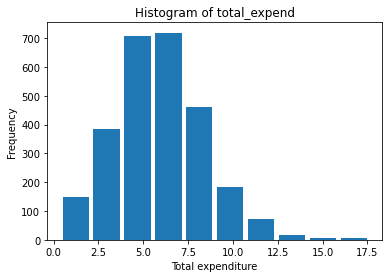

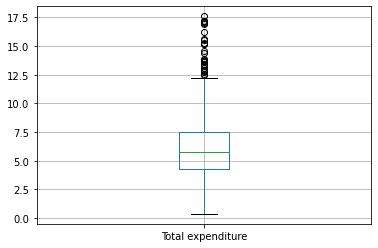

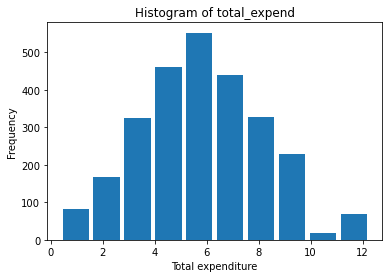

 
0.9213 x + 63.83


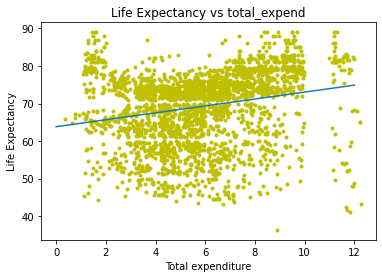

In [223]:
total_expend = data[['Country', 'Year', 'Status', 'Life expectancy ', 'Total expenditure','New Population']]
total_expend = total_expend.dropna(subset=["Total expenditure"]).copy()

plt.hist(x=total_expend['Total expenditure'], rwidth=0.85)
plt.xlabel('Total expenditure')
plt.ylabel('Frequency')
plt.title('Histogram of total_expend')
plt.show()

total_expend.boxplot(column = ['Total expenditure'])
plt.show()

Q1 = total_expend['Total expenditure'].quantile(q=0.25)
Q3 = total_expend['Total expenditure'].quantile(q=0.75)
mask1 = (total_expend['Total expenditure'] < Q3 + 1.5 * (Q3-Q1)) & (total_expend['Total expenditure'] > Q1 - 1.5 * (Q3-Q1))
total_expend = total_expend[mask1]

plt.hist(x=total_expend['Total expenditure'], rwidth=0.85)
plt.xlabel('Total expenditure')
plt.ylabel('Frequency')
plt.title('Histogram of total_expend')
plt.show()

plt.scatter(total_expend['Total expenditure'], total_expend['Life expectancy '], marker=".", color='y')
model = np.poly1d(np.polyfit(total_expend['Total expenditure'], total_expend['Life expectancy '], 1))
polyline = np.linspace(0,12)
plt.plot(polyline, model(polyline))
print(model)
plt.title('Life Expectancy vs total_expend')
plt.xlabel('Total expenditure')
plt.ylabel("Life Expectancy")
plt.show()

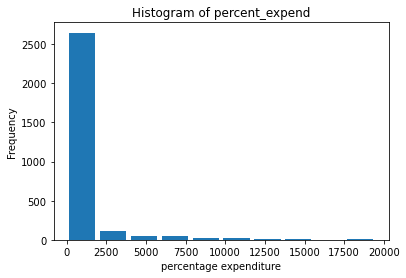

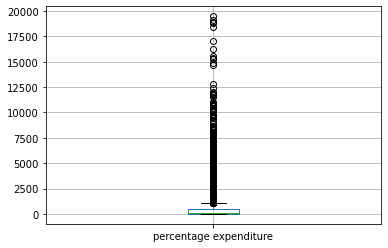

 
0.001827 x + 67.87


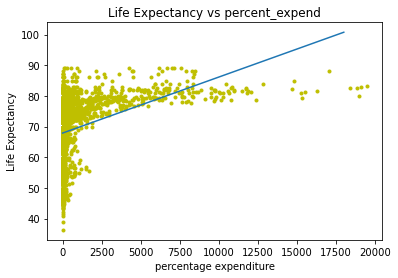

In [235]:
percent_expend = data[['Country', 'Year', 'Status', 'Life expectancy ', 'percentage expenditure','New Population']]
percent_expend = percent_expend.dropna(subset=["percentage expenditure"]).copy()

plt.hist(x=percent_expend['percentage expenditure'], rwidth=0.85)
plt.xlabel('percentage expenditure')
plt.ylabel('Frequency')
plt.title('Histogram of percent_expend')
plt.show()

percent_expend.boxplot(column = ['percentage expenditure'])
plt.show()

# Q1 = percent_expend['percentage expenditure'].quantile(q=0.25)
# Q3 = percent_expend['percentage expenditure'].quantile(q=0.75)
# mask1 = (percent_expend['percentage expenditure'] < Q3 + 1.5 * (Q3-Q1)) & (percent_expend['percentage expenditure'] > Q1 - 1.5 * (Q3-Q1))
# percent_expend = percent_expend[mask1]

# plt.hist(x=percent_expend['percentage expenditure'], rwidth=0.85)
# plt.xlabel('percentage expenditure')
# plt.ylabel('Frequency')
# plt.title('Histogram of percent_expend')
# plt.show()

plt.scatter(percent_expend['percentage expenditure'], percent_expend['Life expectancy '], marker=".", color='y')
model = np.poly1d(np.polyfit(percent_expend['percentage expenditure'], percent_expend['Life expectancy '], 1))
polyline = np.linspace(0,18000)
plt.plot(polyline, model(polyline))
print(model)
plt.title('Life Expectancy vs percent_expend')
plt.xlabel('percentage expenditure')
plt.ylabel("Life Expectancy")
plt.show()

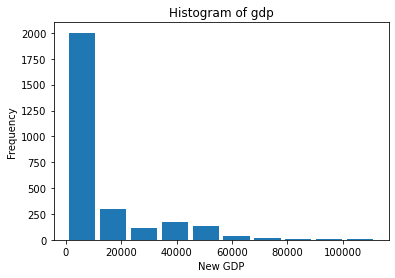

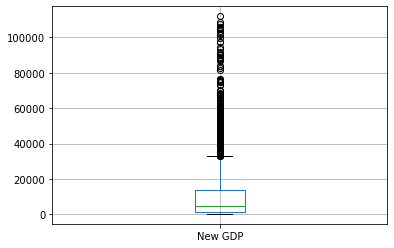

            4             3             2
-1.965e-18 x + 5.594e-13 x - 5.247e-08 x + 0.00181 x + 60.58


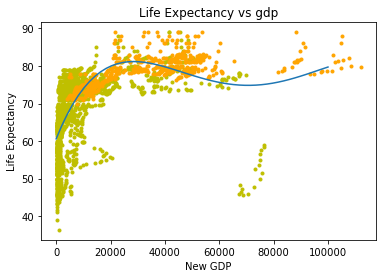

In [247]:
gdp = data[['Country', 'Year', 'Status', 'Life expectancy ', 'New GDP','New Population']]
gdp = gdp.dropna(subset=["New GDP"]).copy()

plt.hist(x=gdp['New GDP'], rwidth=0.85)
plt.xlabel('New GDP')
plt.ylabel('Frequency')
plt.title('Histogram of gdp')
plt.show()

gdp.boxplot(column = ['New GDP'])
plt.show()

# Q1 = gdp['New GDP'].quantile(q=0.25)
# Q3 = gdp['New GDP'].quantile(q=0.75)
# mask1 = (gdp['New GDP'] < Q3 + 1.5 * (Q3-Q1)) & (gdp['New GDP'] > Q1 - 1.5 * (Q3-Q1))
# gdp = gdp[mask1]

# plt.hist(x=gdp['New GDP'], rwidth=0.85)
# plt.xlabel('New GDP')
# plt.ylabel('Frequency')
# plt.title('Histogram of gdp')
# plt.show()

x1 = gdp['New GDP'][gdp['Status'] == 'Developing']
y1 = gdp['Life expectancy '][gdp['Status'] == 'Developing']
x2 = gdp['New GDP'][gdp['Status'] == 'Developed']
y2 = gdp['Life expectancy '][gdp['Status'] == 'Developed']
plt.scatter(x1, y1, marker=".", color='y')
plt.scatter(x2, y2, marker='.', color='orange')
model = np.poly1d(np.polyfit(gdp['New GDP'], gdp['Life expectancy '], 4))
polyline = np.linspace(0,100000)
plt.plot(polyline, model(polyline))
print(model)
plt.title('Life Expectancy vs gdp')
plt.xlabel('New GDP')
plt.ylabel("Life Expectancy")
plt.show()

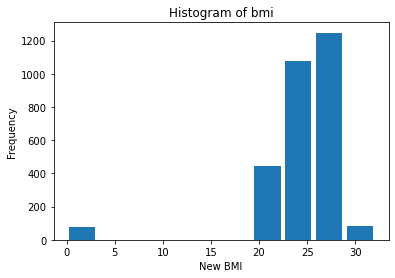

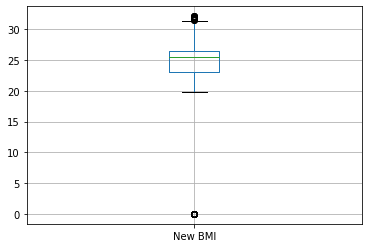

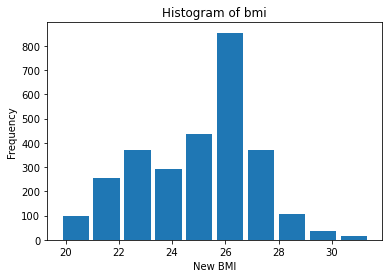

 
2.699 x + 2.105


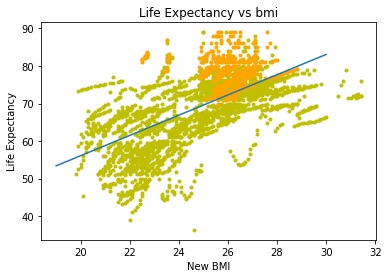

In [251]:
bmi = data[['Country', 'Year', 'Status', 'Life expectancy ', 'New BMI','New Population']]
bmi = bmi.dropna(subset=["New BMI"]).copy()

plt.hist(x=bmi['New BMI'], rwidth=0.85)
plt.xlabel('New BMI')
plt.ylabel('Frequency')
plt.title('Histogram of bmi')
plt.show()

bmi.boxplot(column = ['New BMI'])
plt.show()

Q1 = bmi['New BMI'].quantile(q=0.25)
Q3 = bmi['New BMI'].quantile(q=0.75)
mask1 = (bmi['New BMI'] < Q3 + 1.5 * (Q3-Q1)) & (bmi['New BMI'] > Q1 - 1.5 * (Q3-Q1))
bmi = bmi[mask1]

plt.hist(x=bmi['New BMI'], rwidth=0.85)
plt.xlabel('New BMI')
plt.ylabel('Frequency')
plt.title('Histogram of bmi')
plt.show()

x1 = bmi['New BMI'][bmi['Status'] == 'Developing']
y1 = bmi['Life expectancy '][bmi['Status'] == 'Developing']
x2 = bmi['New BMI'][bmi['Status'] == 'Developed']
y2 = bmi['Life expectancy '][bmi['Status'] == 'Developed']
plt.scatter(x1, y1, marker=".", color='y')
plt.scatter(x2, y2, marker='.', color='orange')
model = np.poly1d(np.polyfit(bmi['New BMI'], bmi['Life expectancy '], 1))
polyline = np.linspace(19,30)
plt.plot(polyline, model(polyline))
print(model)
plt.title('Life Expectancy vs bmi')
plt.xlabel('New BMI')
plt.ylabel("Life Expectancy")
plt.show()